In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drug=pd.read_csv("drug200 (1).csv")

In [4]:
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
drug.shape

(200, 6)

In [7]:
drug['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [9]:
drug['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [10]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
X = drug.drop(columns='Drug')

In [13]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [14]:
y=drug['Drug']

In [15]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

# Label Encoding starts

In [16]:
from sklearn.preprocessing import LabelEncoder 

In [17]:
lbe=LabelEncoder()

In [21]:
cols=['Sex','BP','Cholesterol']
for col in cols:
    X[col]=lbe.fit_transform(X[col].values)
#taking the cols that need to be converted like this and process

In [22]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [23]:
lbe_sex=LabelEncoder()
lbe_sex.fit(['F','M'])

LabelEncoder()

In [24]:
drug['Sex']=lbe_sex.transform(drug['Sex'])
#another way of label encoding 

In [25]:
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC
196,16,1,LOW,HIGH,12.006,drugC
197,52,1,NORMAL,HIGH,9.894,drugX
198,23,1,NORMAL,NORMAL,14.020,drugX


# Train Test splitting

In [26]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
116,67,1,2,1,9.514
67,17,1,2,1,10.832
78,19,0,0,0,13.313
42,50,1,2,1,15.790
17,43,1,0,0,13.972
...,...,...,...,...,...
133,24,1,2,0,25.786
137,35,0,0,0,12.894
72,24,0,2,0,10.605
140,49,1,0,1,6.269


In [34]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
58,60,1,2,1,10.091
40,73,0,2,0,19.221
34,53,1,2,0,14.133
102,28,0,1,0,13.127
184,18,0,0,0,37.188
198,23,1,2,1,14.020
95,36,1,1,1,11.424
4,61,0,1,0,18.043
29,45,1,1,0,17.951
168,51,0,1,1,23.003


In [35]:
y_train

116    drugX
67     drugX
78     drugA
42     drugY
17     drugA
       ...  
133    drugY
137    drugA
72     drugX
140    drugA
37     drugX
Name: Drug, Length: 140, dtype: object

In [36]:
y_test

58     drugX
40     drugY
34     drugX
102    drugC
184    drugY
198    drugX
95     drugX
4      drugY
29     drugY
168    drugY
171    drugX
18     drugC
11     drugY
89     drugY
110    drugA
118    drugA
159    drugX
35     drugX
136    drugB
59     drugY
51     drugX
16     drugX
44     drugX
94     drugY
31     drugB
162    drugX
38     drugX
28     drugY
193    drugC
27     drugX
47     drugC
165    drugY
194    drugY
177    drugY
176    drugA
97     drugY
174    drugA
73     drugY
69     drugY
172    drugY
108    drugB
107    drugY
189    drugY
14     drugX
56     drugB
19     drugY
114    drugX
39     drugX
185    drugY
124    drugB
98     drugY
123    drugY
119    drugY
53     drugY
33     drugY
179    drugY
181    drugX
106    drugX
199    drugX
138    drugB
Name: Drug, dtype: object

# Decission Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
drugtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [39]:
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
drugtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
predtree=drugtree.predict(X_test)
#prediction

In [42]:
predtree

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugX', 'drugB', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugA'], dtype=object)

# evaluation matrix
#can do different methods of evaluation matrix here we use accuracy

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print("Accuracy is ",accuracy_score(y_test,predtree))

Accuracy is  0.9666666666666667


# plotting tree

In [46]:
    from sklearn.tree import plot_tree

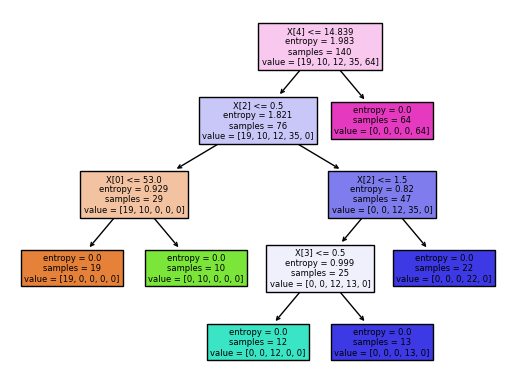

In [49]:
plot_tree(drugtree,filled=True)
plt.show()